In [1]:
from MCTS import MCTS
from TSP import TSPGame
from NETS import RecurrentNN, create_training_set, ConvolutionalNN, GraphConvolutionalNN
from EVALUATE import evaluation_run, plot_comparison, create_comparison
from SELFPLAY import Coach
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class dotdict(dict):
    def __getattr__(self, name):
        return self[name]

In [3]:
num_node = 7
numAssess = 100
numEps = 300
validation_split = 0.2
numGens = 10
patience = 50

args = dotdict({
    # MCTS args
    'numMCTSSims': 500,        # Number of games moves for MCTS to simulate in self-play
    'num_node': num_node,              # Number of nodes in the graph (game)
    'cpuct': 1,
    
    # Self Play
    'numEps': numEps,
    'numAssess': numAssess,
    'numGens': numGens,
    'winThresh': 1.0           # 1 Thresh means replace on any total improvement

    })

rnn_args = dotdict({
    # State representation
    'history': True,           # Whether state representation should be a history of states - used for lstm
    'history_length': None,     # If None full history
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 300,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

cnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 300,
    'batch_size': 64,
    'num_channels': 256,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args = dotdict({
    # State representation
    'history': False,           # Whether state representation should be a history of states - used for lstm
    
    # NN args
    'lr': 0.001,
    'epochs': 500,
    'batch_size': 64,
    'validation_split': validation_split,
    'patience': patience
    })

gnn_args.update(args)
cnn_args.update(args)
rnn_args.update(args)

In [4]:
%%time

# Create a optimal dataset from 10000 games
dataset = create_training_set(gnn_args, 5000)

CPU times: user 2min 18s, sys: 315 ms, total: 2min 18s
Wall time: 2min 18s


In [5]:
# Create RNN
rnn = RecurrentNN(rnn_args)
gnn = GraphConvolutionalNN(gnn_args)
cnn = ConvolutionalNN(cnn_args)

### Train

In [6]:
filename = '7node_5000sample'

In [7]:
%%time
rnn_hist = rnn.train(dataset)
rnn.save_model('rnn_'+filename)

Training...
Train on 24000 samples, validate on 6000 samples
Epoch 1/300
24000/24000 [==============================] - 29s 1ms/step - loss: 1.5087 - pi_loss: 1.4332 - v_loss: 0.0755 - val_loss: 1.2407 - val_pi_loss: 1.1718 - val_v_loss: 0.0688
Epoch 2/300
24000/24000 [==============================] - 30s 1ms/step - loss: 1.2547 - pi_loss: 1.1908 - v_loss: 0.0638 - val_loss: 1.1567 - val_pi_loss: 1.1031 - val_v_loss: 0.0535
Epoch 3/300
24000/24000 [==============================] - 35s 1ms/step - loss: 1.2105 - pi_loss: 1.1512 - v_loss: 0.0593 - val_loss: 1.1648 - val_pi_loss: 1.1034 - val_v_loss: 0.0614
Epoch 4/300
24000/24000 [==============================] - 37s 2ms/step - loss: 1.1882 - pi_loss: 1.1315 - v_loss: 0.0567 - val_loss: 1.1593 - val_pi_loss: 1.1059 - val_v_loss: 0.0533
Epoch 5/300
24000/24000 [==============================] - 32s 1ms/step - loss: 1.1736 - pi_loss: 1.1179 - v_loss: 0.0556 - val_loss: 1.1396 - val_pi_loss: 1.0896 - val_v_loss: 0.0501
Epoch 6/300
24000/2

24000/24000 [==============================] - 28s 1ms/step - loss: 0.9269 - pi_loss: 0.8793 - v_loss: 0.0475 - val_loss: 0.8676 - val_pi_loss: 0.8211 - val_v_loss: 0.0464
Epoch 46/300
24000/24000 [==============================] - 29s 1ms/step - loss: 0.9224 - pi_loss: 0.8749 - v_loss: 0.0475 - val_loss: 0.8667 - val_pi_loss: 0.8206 - val_v_loss: 0.0461
Epoch 47/300
24000/24000 [==============================] - 28s 1ms/step - loss: 0.9164 - pi_loss: 0.8689 - v_loss: 0.0474 - val_loss: 0.8604 - val_pi_loss: 0.8132 - val_v_loss: 0.0471
Epoch 48/300
24000/24000 [==============================] - 29s 1ms/step - loss: 0.9095 - pi_loss: 0.8622 - v_loss: 0.0473 - val_loss: 0.8412 - val_pi_loss: 0.7915 - val_v_loss: 0.0497
Epoch 49/300
24000/24000 [==============================] - 29s 1ms/step - loss: 0.9054 - pi_loss: 0.8580 - v_loss: 0.0474 - val_loss: 0.8474 - val_pi_loss: 0.8003 - val_v_loss: 0.0471
Epoch 50/300
24000/24000 [==============================] - 29s 1ms/step - loss: 0.8993 

24000/24000 [==============================] - 28s 1ms/step - loss: 0.7678 - pi_loss: 0.7221 - v_loss: 0.0457 - val_loss: 0.7149 - val_pi_loss: 0.6709 - val_v_loss: 0.0440
Epoch 90/300
24000/24000 [==============================] - 28s 1ms/step - loss: 0.7665 - pi_loss: 0.7211 - v_loss: 0.0455 - val_loss: 0.7206 - val_pi_loss: 0.6768 - val_v_loss: 0.0438
Epoch 91/300
24000/24000 [==============================] - 27s 1ms/step - loss: 0.7594 - pi_loss: 0.7140 - v_loss: 0.0454 - val_loss: 0.7275 - val_pi_loss: 0.6826 - val_v_loss: 0.0449
Epoch 92/300
24000/24000 [==============================] - 25s 1ms/step - loss: 0.7608 - pi_loss: 0.7158 - v_loss: 0.0450 - val_loss: 0.7278 - val_pi_loss: 0.6837 - val_v_loss: 0.0441
Epoch 93/300
24000/24000 [==============================] - 24s 989us/step - loss: 0.7579 - pi_loss: 0.7122 - v_loss: 0.0456 - val_loss: 0.7270 - val_pi_loss: 0.6824 - val_v_loss: 0.0446
Epoch 94/300
24000/24000 [==============================] - 23s 945us/step - loss: 0.7

Epoch 133/300
24000/24000 [==============================] - 20s 833us/step - loss: 0.6891 - pi_loss: 0.6447 - v_loss: 0.0443 - val_loss: 0.6935 - val_pi_loss: 0.6503 - val_v_loss: 0.0431
Epoch 134/300
24000/24000 [==============================] - 19s 786us/step - loss: 0.6772 - pi_loss: 0.6335 - v_loss: 0.0436 - val_loss: 0.6928 - val_pi_loss: 0.6503 - val_v_loss: 0.0425
Epoch 135/300
24000/24000 [==============================] - 19s 775us/step - loss: 0.6847 - pi_loss: 0.6405 - v_loss: 0.0442 - val_loss: 0.6967 - val_pi_loss: 0.6532 - val_v_loss: 0.0435
Epoch 136/300
24000/24000 [==============================] - 19s 774us/step - loss: 0.6821 - pi_loss: 0.6379 - v_loss: 0.0441 - val_loss: 0.7008 - val_pi_loss: 0.6578 - val_v_loss: 0.0430
Epoch 137/300
24000/24000 [==============================] - 19s 781us/step - loss: 0.6843 - pi_loss: 0.6400 - v_loss: 0.0442 - val_loss: 0.6954 - val_pi_loss: 0.6530 - val_v_loss: 0.0424
Epoch 138/300
24000/24000 [==============================] -

24000/24000 [==============================] - 21s 865us/step - loss: 0.6391 - pi_loss: 0.5958 - v_loss: 0.0432 - val_loss: 0.6779 - val_pi_loss: 0.6354 - val_v_loss: 0.0425
Epoch 177/300
24000/24000 [==============================] - 21s 888us/step - loss: 0.6354 - pi_loss: 0.5923 - v_loss: 0.0432 - val_loss: 0.6822 - val_pi_loss: 0.6399 - val_v_loss: 0.0423
Epoch 178/300
24000/24000 [==============================] - 19s 802us/step - loss: 0.6343 - pi_loss: 0.5913 - v_loss: 0.0430 - val_loss: 0.6791 - val_pi_loss: 0.6366 - val_v_loss: 0.0426
Epoch 179/300
24000/24000 [==============================] - 21s 874us/step - loss: 0.6325 - pi_loss: 0.5890 - v_loss: 0.0435 - val_loss: 0.6867 - val_pi_loss: 0.6440 - val_v_loss: 0.0427
Epoch 180/300
24000/24000 [==============================] - 21s 876us/step - loss: 0.6316 - pi_loss: 0.5882 - v_loss: 0.0435 - val_loss: 0.6892 - val_pi_loss: 0.6444 - val_v_loss: 0.0448
Epoch 181/300
24000/24000 [==============================] - 21s 875us/ste

In [8]:
%%time
gnn_losses = gnn.train(dataset)
gnn.save_model('gnn_'+filename)

/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/TZilkha/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/500 Loss - 0.5058849314349481
Epoch 20/500 Loss - 0.42912520223907286
Epoch 30/500 Loss - 0.40780648187331675
Epoch 40/500 Loss - 0.4004066653783598
Epoch 50/500 Loss - 0.39729362105700333
Epoch 60/500 Loss - 0.39439502856438463
Epoch 70/500 Loss - 0.3905617385539116
Epoch 80/500 Loss - 0.3887156181964619
Epoch 90/500 Loss - 0.38175531641793237
Epoch 100/500 Loss - 0.3827311342298098
Epoch 110/500 Loss - 0.38057840185860653
Epoch 120/500 Loss - 0.38070866418836485
Epoch 130/500 Loss - 0.38001281276693666
Epoch 140/500 Loss - 0.3788742715738165
No improvement - Early Stopping
CPU times: user 2h 39min 39s, sys: 59.7 s, total: 2h 40min 39s
Wall time: 2h 40min 44s


In [9]:
%%time
cnn_hist = cnn.train(dataset)
cnn.save_model('cnn_'+filename)

Training...
Train on 24000 samples, validate on 6000 samples
Epoch 1/300
24000/24000 [==============================] - 94s 4ms/step - loss: 1.9577 - pi_loss: 1.2695 - v_loss: 0.6882 - val_loss: 2.0222 - val_pi_loss: 1.3497 - val_v_loss: 0.6725
Epoch 2/300
24000/24000 [==============================] - 114s 5ms/step - loss: 1.6991 - pi_loss: 1.0265 - v_loss: 0.6727 - val_loss: 1.6120 - val_pi_loss: 0.9395 - val_v_loss: 0.6725
Epoch 3/300
24000/24000 [==============================] - 106s 4ms/step - loss: 1.6150 - pi_loss: 0.9383 - v_loss: 0.6767 - val_loss: 1.5599 - val_pi_loss: 0.8873 - val_v_loss: 0.6725
Epoch 4/300
24000/24000 [==============================] - 105s 4ms/step - loss: 1.5544 - pi_loss: 0.8777 - v_loss: 0.6767 - val_loss: 1.5042 - val_pi_loss: 0.8317 - val_v_loss: 0.6725
Epoch 5/300
24000/24000 [==============================] - 106s 4ms/step - loss: 1.5029 - pi_loss: 0.8262 - v_loss: 0.6767 - val_loss: 1.5132 - val_pi_loss: 0.8407 - val_v_loss: 0.6725
Epoch 6/300
240

Epoch 45/300
24000/24000 [==============================] - 107s 4ms/step - loss: 0.1408 - pi_loss: 0.0931 - v_loss: 0.0477 - val_loss: 1.2898 - val_pi_loss: 1.2339 - val_v_loss: 0.0560
Epoch 46/300
24000/24000 [==============================] - 108s 5ms/step - loss: 0.1325 - pi_loss: 0.0860 - v_loss: 0.0465 - val_loss: 1.2386 - val_pi_loss: 1.1988 - val_v_loss: 0.0397
Epoch 47/300
24000/24000 [==============================] - 107s 4ms/step - loss: 0.1355 - pi_loss: 0.0897 - v_loss: 0.0458 - val_loss: 1.2419 - val_pi_loss: 1.1962 - val_v_loss: 0.0457
Epoch 48/300
24000/24000 [==============================] - 109s 5ms/step - loss: 0.1208 - pi_loss: 0.0744 - v_loss: 0.0464 - val_loss: 1.3524 - val_pi_loss: 1.3120 - val_v_loss: 0.0403
Epoch 49/300
24000/24000 [==============================] - 108s 4ms/step - loss: 0.1183 - pi_loss: 0.0741 - v_loss: 0.0442 - val_loss: 1.3061 - val_pi_loss: 1.2675 - val_v_loss: 0.0386
Epoch 50/300
24000/24000 [==============================] - 107s 4ms/s

In [10]:
rnn.load_model("rnn_"+filename)
gnn.load_model("gnn_"+filename)
cnn.load_model('cnn_'+filename)

Loaded model from disk
Loaded model from disk
Loaded model from disk


In [11]:
def plot_training(history, model_name):
    # Plot training & validation v loss values
    plt.plot(history['v_loss'])
    plt.plot(history['val_v_loss'])
    plt.title(model_name+' - v Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['v', 'val_v'])
    plt.show()

    # Plot training & validation pi loss values
    plt.plot(history['pi_loss'])
    plt.plot(history['val_pi_loss'])
    plt.title(model_name+' - pi Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['pi', 'val_pi'])
    plt.show()

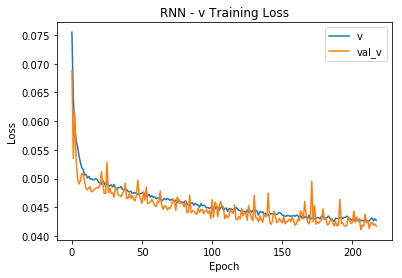

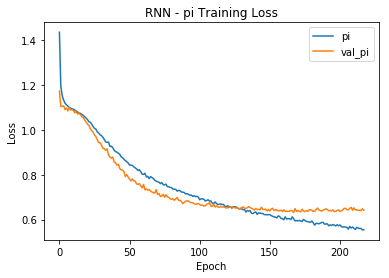

In [12]:
plot_training(rnn_hist.history, 'RNN')

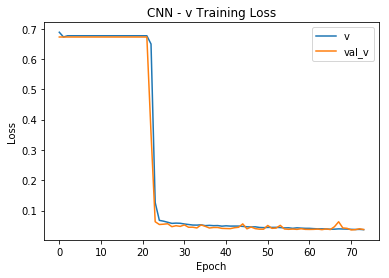

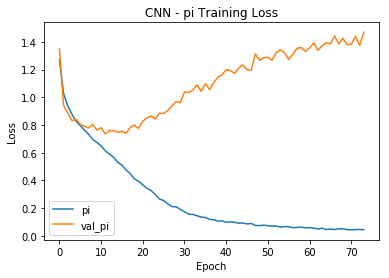

In [13]:
plot_training(cnn_hist.history, 'CNN')

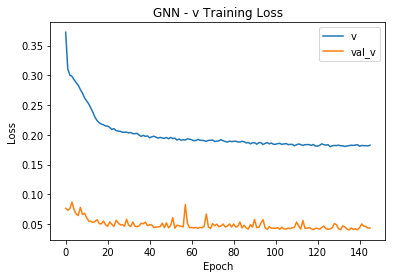

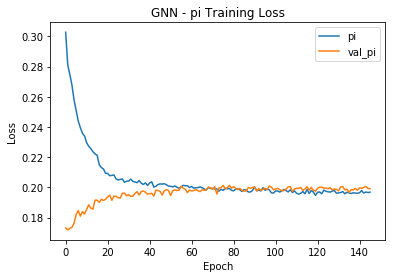

In [14]:
plot_training(gnn_losses, 'GNN')

### Evaluate

In [15]:
%%time

args['numMCTSSims']=2000

game_list = [TSPGame(args) for i in range(200)]

nets = {"No NN": None, 
        "LSTM": rnn,
        'GNN': gnn,
        'CNN': cnn}

res = create_comparison(game_list, nets, args)

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...92...93...94...95...96...97...98...99...100...101...102...103...104...105...106...107...108...109...110...111...112...113...114...115...116...117...118...119...120...121...122...123...124...125...126...127...128...129...130...131...132...133...134...135...136...137...138...139...140...141...142...143...144...145...146...147...148...149...150...151...152...153...154...155...156...157...158...159...160...161...162...163...164...165...166...167...168...169...170...171...172...173...174...175...176...177...178...179...180...181...182...183...184...

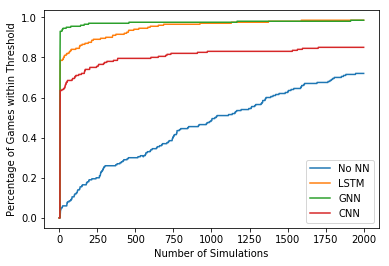

In [17]:
plot_comparison(res)

In [18]:
cnn.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7, 2)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 7, 2)         0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 7, 2, 1)      0           input_2[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 7, 2, 1)      0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d (Co